**知识点复盘：**
- 字典的简单介绍（增删查改）
- 标签编码（字典的映射）
- 对独热编码的深入理解----n个不相关变量只有n-1个自由的
- 连续特征的处理：归一化和标准化----一般选一个即可，谁好谁坏做了才知道，除非有先验知识。
- 
---
# 字典的简单介绍
**字典的性质**:
- **可变类型**: 字典创建后可以修改、添加或删除键值对
- **键的唯一性**: 字典中的键必须是唯一的,重复的键会被覆盖
- **键的不可变性**: 键必须是不可变类型(如字符串、数字、元组),不能用列表做键
- **值的任意性**: 值可以是任何数据类型,可以重复

In [78]:
# 字典用花括号创建
my_dict = {'name': 'Alice', 'age': 25, 'city': 'New York'}
my_dict

{'name': 'Alice', 'age': 25, 'city': 'New York'}

In [79]:
# 访问字典中的值
my_dict['name']

'Alice'

In [80]:
# 修改字典中的值
my_dict['age']=22
my_dict['age']

22

In [81]:
# 添加新的键值对
my_dict['job']='Engineer'
my_dict

{'name': 'Alice', 'age': 22, 'city': 'New York', 'job': 'Engineer'}

---
# 标签编码
之前介绍了无序的离散特征的编码（独热编码），现在来介绍有序或者有大小关系的离散特征的编码

In [82]:
import pandas as pd

data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**二分类的问题不需要独热编码**，比如性别这个特征，男女不需要变成2个特征(性别男、性别女)。因为他们二者自由度为1，如果是2个特征的话，性别男=1，那么性别女必定等于0。这样特征高度相关，没有价值。此时这个特征的含义不是性别，而是：**是否为男性**，1是男性，0是非男。
只看前几行可能无法那么快看出谁是比较适应离散编码的，我们可以直接来看每个特征的数据分布情况，但在这之前先检查并进行缺失值填补

In [83]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

没有缺失值，直接进行编码

In [84]:
# 观察哪个适合独热编码，打印内容太多不全部展示
# for column in data.columns:
#     print(data[column].value_counts())

'''
部分打印内容如下：
slope
2    142
1    140
0     21
Name: count, dtype: int64
ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
'''

'\n部分打印内容如下：\nslope\n2    142\n1    140\n0     21\nName: count, dtype: int64\nca\n0    175\n1     65\n2     38\n3     20\n4      5\nName: count, dtype: int64\n'

可以看到原数据是编码过的，为了方便演示，我们先把原数据的编码都乘2，模拟一般情况，之后再编码回来

In [85]:
data['slope']=data['slope']*2
data['ca']=data['ca']*2
print(data['slope'].value_counts(),data['ca'].value_counts(),sep='\n')

slope
4    142
2    140
0     21
Name: count, dtype: int64
ca
0    175
2     65
4     38
6     20
8      5
Name: count, dtype: int64


我们假定数值越大越严重，数据越重要，编码值越大

In [86]:
# 嵌套字典进行多特征编码
mapping={
    'slope':{
        0:0,
        2:1,
        4:2
    },
    'ca':{
        0:0,
        2:1,
        4:2,
        6:3,
        8:4
    }
}

data['slope']=data['slope'].map(mapping['slope'])
data['ca']=data['ca'].map(mapping['ca'])
print(data['slope'].value_counts(),data['ca'].value_counts(),sep='\n')

slope
2    142
1    140
0     21
Name: count, dtype: int64
ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


至此编码结束

---

# 连续特征的归一化or标准化


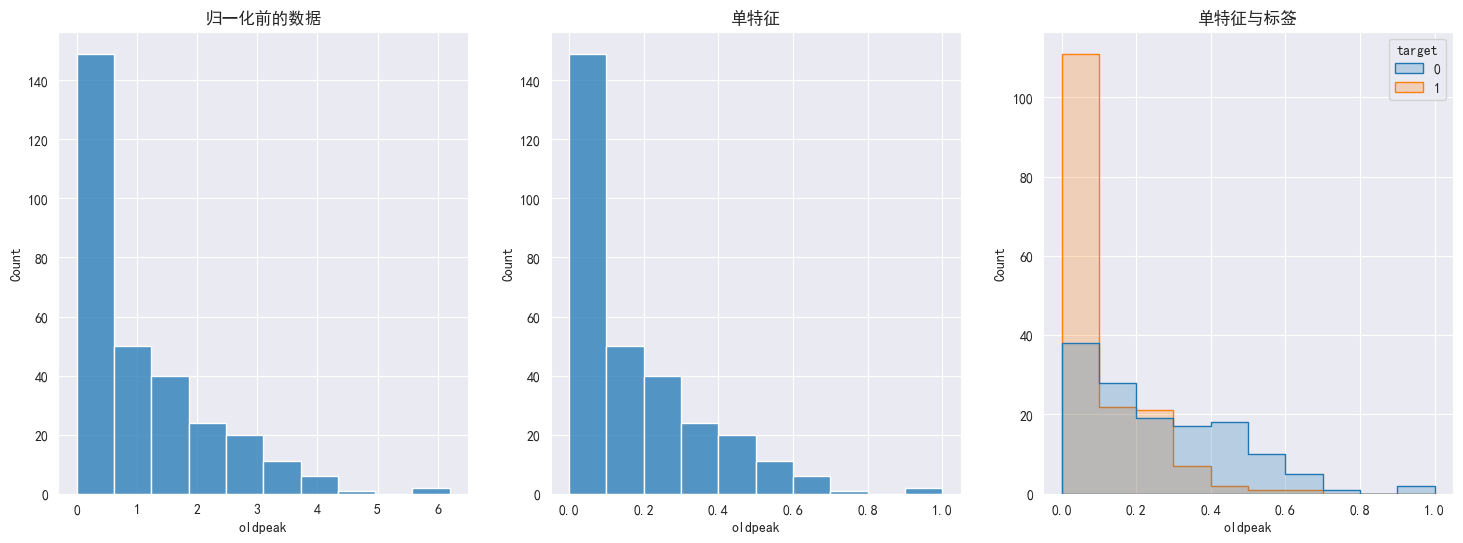

In [87]:
# 使用sklearn库
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和负号，防止乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(x=data['oldpeak'],bins=10)
plt.title('归一化前的数据')

min_max_scaler = MinMaxScaler()
data['oldpeak']=min_max_scaler.fit_transform(data[['oldpeak']])

plt.subplot(1,3,2)
sns.histplot(x=data['oldpeak'],bins=10)
plt.title('单特征')

plt.subplot(1,3,3)
sns.histplot(x=data['oldpeak'],bins=10,hue=data['target'],element='step')
plt.title('单特征与标签')
plt.show()

可以直观看到数据归一化后的效果

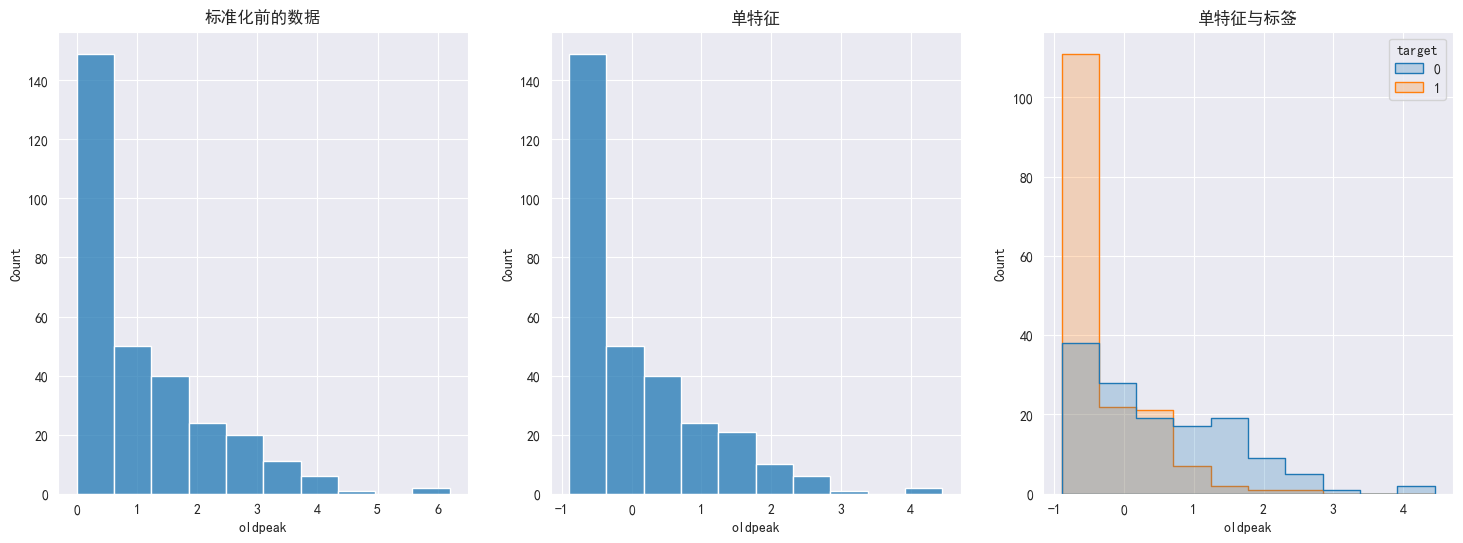

In [88]:
data=pd.read_csv('heart.csv')

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.histplot(x=data['oldpeak'],bins=10)
plt.title('标准化前的数据')

standard_scaler = StandardScaler() 
data['oldpeak']=standard_scaler.fit_transform(data[['oldpeak']])

plt.subplot(1,3,2)
sns.histplot(x=data['oldpeak'],bins=10)
plt.title('单特征')

plt.subplot(1,3,3)
sns.histplot(x=data['oldpeak'],bins=10,hue=data['target'],element='step')
plt.title('单特征与标签')
plt.show()

可以直观看到数据标准化后的效果